In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [19]:
df = pd.read_excel('solar.xlsx')

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


             Temperature  Humidity  Dust_Level  Rainfall  Performance
Temperature     1.000000  0.789864    0.658539  0.187099    -0.489765
Humidity        0.789864  1.000000    0.499350  0.297755    -0.367714
Dust_Level      0.658539  0.499350    1.000000  0.504712    -0.558358
Rainfall        0.187099  0.297755    0.504712  1.000000    -0.490725
Performance    -0.489765 -0.367714   -0.558358 -0.490725     1.000000


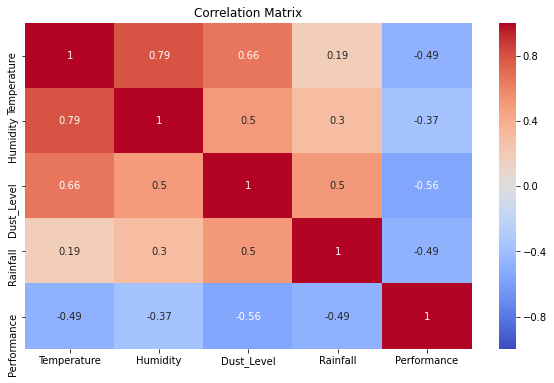

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

C:\Users\ABDULSHAKUR GALLA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ABDULSHAKUR GALLA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ABDULSHAKUR GALLA\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ABDULSHAKUR GALLA\An

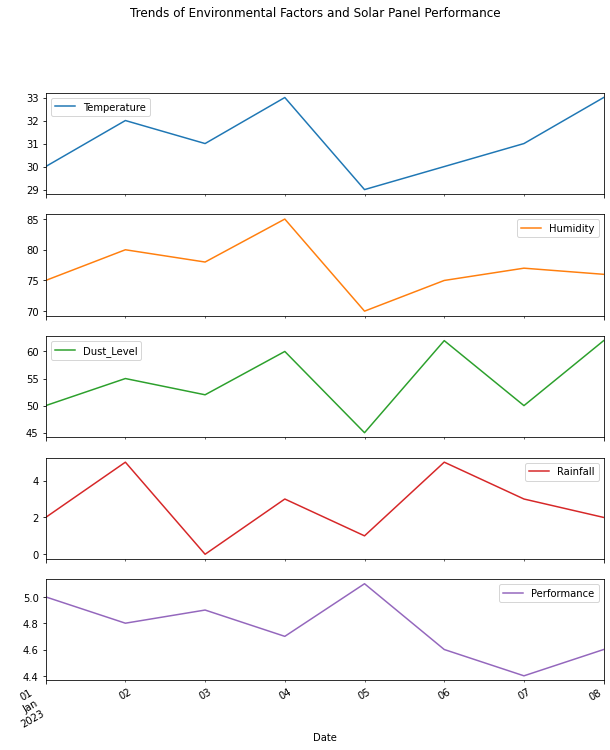

In [22]:
# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot trends
df.plot(subplots=True, figsize=(10, 12), layout=(5, 1))
plt.suptitle('Trends of Environmental Factors and Solar Panel Performance')
plt.show()

Pearson Correlation (Temperature vs. Performance): -0.4897654596926428
Pearson Correlation (Humidity vs. Performance): -0.3677139123722881
Pearson Correlation (Dust Level vs. Performance): -0.5583576982446488
Pearson Correlation (Rainfall vs. Performance): -0.49072491095998105
             Temperature  Humidity  Dust_Level  Rainfall  Performance
Temperature     1.000000  0.789864    0.658539  0.187099    -0.489765
Humidity        0.789864  1.000000    0.499350  0.297755    -0.367714
Dust_Level      0.658539  0.499350    1.000000  0.504712    -0.558358
Rainfall        0.187099  0.297755    0.504712  1.000000    -0.490725
Performance    -0.489765 -0.367714   -0.558358 -0.490725     1.000000


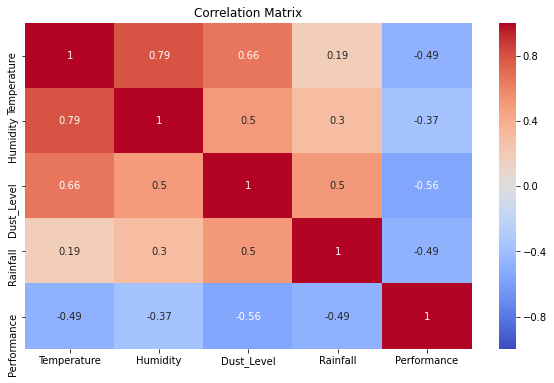

In [24]:
# Calculate Pearson correlation coefficients
temperature_corr, _ = pearsonr(df['Temperature'], df['Performance'])
humidity_corr, _ = pearsonr(df['Humidity'], df['Performance'])
dust_corr, _ = pearsonr(df['Dust_Level'], df['Performance'])
rainfall_corr, _ = pearsonr(df['Rainfall'], df['Performance'])

print(f"Pearson Correlation (Temperature vs. Performance): {temperature_corr}")
print(f"Pearson Correlation (Humidity vs. Performance): {humidity_corr}")
print(f"Pearson Correlation (Dust Level vs. Performance): {dust_corr}")
print(f"Pearson Correlation (Rainfall vs. Performance): {rainfall_corr}")

# Display the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Define the independent variables (environmental factors)
X = df[['Temperature', 'Humidity', 'Dust_Level', 'Rainfall']]

# Define the dependent variable (solar panel performance)
y = df['Performance']

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                 -0.324
Method:                 Least Squares   F-statistic:                    0.5717
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.705
Time:                        17:28:54   Log-Likelihood:                 3.1161
No. Observations:                   8   AIC:                             3.768
Df Residuals:                       3   BIC:                             4.165
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7408      2.288      2.946      

C:\Users\ABDULSHAKUR GALLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [30]:
import joblib

In [31]:
# Export the model using joblib
joblib_file = "solar_performance_model.pkl"
joblib.dump(model, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to solar_performance_model.pkl


In [34]:
# To load the model for simulation later
loaded_model = joblib.load(joblib_file)
print("Model loaded for simulation")

# Example usage of the loaded model for prediction
# New data for simulation
new_data = {
    'Temperature': [31, 30, 29],
    'Humidity': [76, 77, 78],
    'Dust_Level': [53, 54, 55],
    'Rainfall': [1, 2, 1]
}

new_df = pd.DataFrame(new_data)
new_df = sm.add_constant(new_df)

# Predict performance
predictions = loaded_model.predict(new_df)
print("Predicted Performance:", predictions)

Model loaded for simulation
Predicted Performance: 0    4.851988
1    4.881942
2    5.013134
dtype: float64


In [36]:
from sklearn.metrics import mean_absolute_error
y_true = df['Performance']
y_pred = model.predict(X)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.11809052135680254


In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.026865748233783456
Root Mean Squared Error: 0.16390774305621883


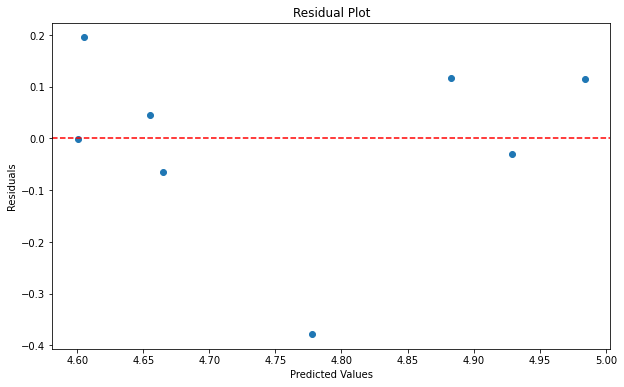

In [38]:
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


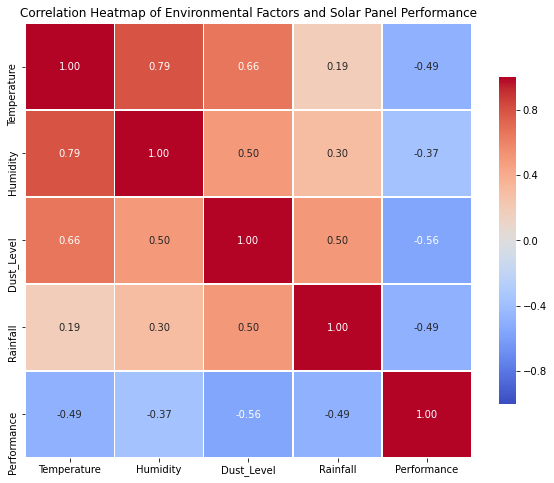

In [40]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', 
            linewidths=.5, cbar_kws={"shrink": .75})

# Set the title
plt.title('Correlation Heatmap of Environmental Factors and Solar Panel Performance')

# Show the plot
plt.show()